# LINEAR REGRESSION MODEL IMPLEMENTATION

In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import operator

In [460]:
df = pd.read_csv("atmosphere_data1.csv")  # Importing the csv as a dataframe
df.head()

,humidity,pressure,rain,lightAvg,lightMax,moisture,temperature
0,87.64615,1027.830769,254.25,274.6232,4333,31.2385,24.06923
1,95.94805,1006.924675,339.75,14148.9787,54612,100.0000,21.20779
2,96.17143,1006.568571,38.25,134.9000,4000,93.2000,23.48571
3,98.58974,1009.415385,29.25,659.8889,4000,5.7692,21.79487
4,88.32710,991.654112,4.50,2168.3333,6295,4.2897,25.09346


In [461]:
# Find correlation coefficient
df['temperature'].corr(df['pressure'])

-0.5862511816495377

### Finding correlation between all the attributes

In [462]:
print(df['temperature'].corr(df['humidity']))
print(df.corr())

0.32042034947227643
             humidity  pressure      rain  lightAvg  lightMax  moisture  \
humidity     1.000000 -0.443664 -0.574543 -0.372385 -0.320195 -0.153100   
pressure    -0.443664  1.000000  0.435406  0.212624  0.112181  0.105356   
rain        -0.574543  0.435406  1.000000  0.539015  0.347064  0.451626   
lightAvg    -0.372385  0.212624  0.539015  1.000000  0.634159  0.349297   
lightMax    -0.320195  0.112181  0.347064  0.634159  1.000000  0.038260   
moisture    -0.153100  0.105356  0.451626  0.349297  0.038260  1.000000   
temperature  0.320420 -0.586251 -0.187917 -0.225644 -0.093311  0.001578   

             temperature  
humidity        0.320420  
pressure       -0.586251  
rain           -0.187917  
lightAvg       -0.225644  
lightMax       -0.093311  
moisture        0.001578  
temperature     1.000000  


## Since all the parameters have negative or less than 0.2 Pearson's correlation with Temperature except Humidity so we have to neglect those attributes.


In [463]:
print("The Data set has {} rows and {} columns\n".format(df.shape[0],df.shape[1]))


The Data set has 819 rows and 7 columns



### Checking Missing Values in the Dataframe

In [464]:
#Names of all columns
columns = df.columns.values.tolist()
#Checking for Null Values:
vals=df[columns].isnull().sum()
print(vals)
print("\nTotal NAN values in the File: ",vals.sum())

humidity       0
pressure       0
rain           0
lightAvg       0
lightMax       0
moisture       0
temperature    0
dtype: int64

Total NAN values in the File:  0


In [465]:
Y = df["temperature"]
X = df["humidity"]

In [466]:
#Predictor
#[X_train, X_test, Y_train, Y_test] = train_test_split(X, Y,test_size=0.3, random_state=0,shuffle=True)
#plt.figure(figsize=(10,5))
#sns.lmplot(x="humidity", y="temperature", data=df, fit_reg=True, scatter=True)

In [467]:

#Predictor
[X_train, X_test, Y_train, Y_test] = train_test_split(X, Y,test_size=0.3, random_state=5,shuffle=True)
X_train = np.array(X_train)
print(X_train.shape)
X_train = X_train.reshape(-1,1)  #X_train.reshape(573,1)
print(X_train.shape)
print(X_train.ndim)
X_test = np.array(X_test)
X_test = X_test.reshape(-1,1)
print(X_test.ndim)

(573,)
(573, 1)
2
2


In [468]:
#Fitting a Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
y_pred_train = regressor.predict(X_train)
print(y_pred_train.ndim)
y_pred_test = regressor.predict(X_test)
print(y_pred_test.ndim)

1
1


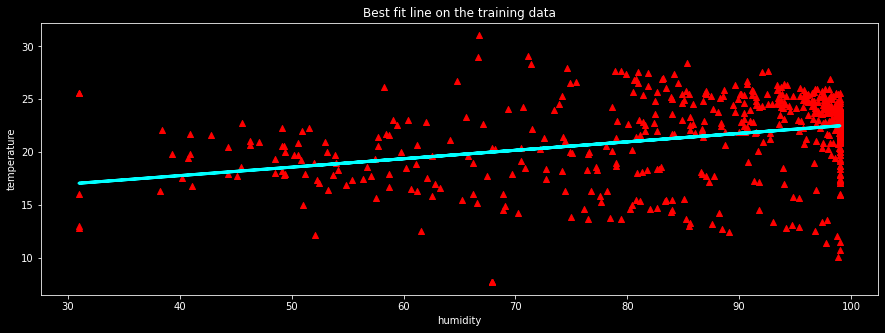

In [469]:
plt.figure(figsize=(15,5))
plt.style.use("dark_background")
plt.scatter(X_train,Y_train,marker = "^", c = "red") # Original data points
plt.plot(X_train,y_pred_train,c= "cyan",lw=3 )  # Predicted line
plt.xlabel("humidity")
plt.ylabel("temperature")
plt.title("Best fit line on the training data")
plt.show()

In [470]:
MSE_train = mean_squared_error(Y_train,y_pred_train)
RMSE_train = np.sqrt(MSE_train)
print("RMSE TRAIN :",RMSE_train)

RMSE TRAIN : 3.818933685304276


In [471]:
MSE_test = mean_squared_error(Y_test,y_pred_test)
RMSE_test = np.sqrt(MSE_test)
print("RMSE TEST :",RMSE_test,"\n")

RMSE TEST : 3.8978434305652367 



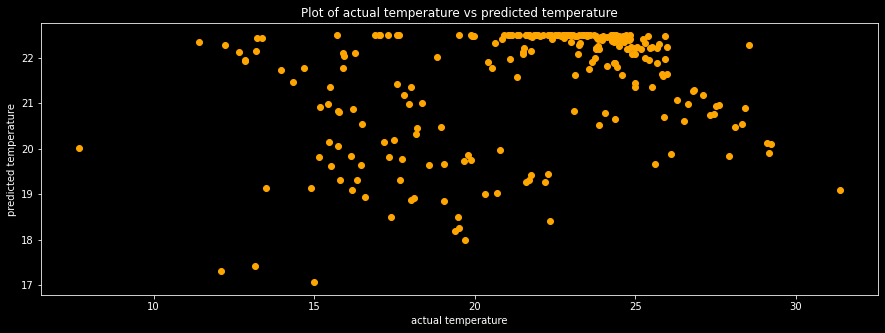

In [472]:
plt.figure(figsize=(15,5))
plt.scatter(Y_test,y_pred_test,marker = "o",color = "orange")
plt.xlabel("actual temperature")
plt.ylabel("predicted temperature")
plt.title("Plot of actual temperature vs predicted temperature")
plt.show()

# POLYNOMIAL CURVE FITTING MODEL

In [473]:
#Polynomial Model Implementation.
rmse_train={} #To store rmse values for different p
rmse_test={}
ypred_train={}
ypred_test={}
for p in range(10):
    polynomial_features = PolynomialFeatures(degree=p)    
    #print("For degree=",p,", the dimension of polynomial features:",poly_feat.shape)
    polynomial_features.fit(X_train)
    x_poly = polynomial_features.transform(X_train)
    print("For degree=",p,", the dimension of polynomial features:",x_poly.shape)
    # If input is 2D, then degree=2 will produce 6D features, [1,x,y,xy,x^2,y^2]
    regressor = LinearRegression() #Model Will Be Trained.
    regressor.fit(x_poly, Y_train)
    #Model Prediction
    y_pred_train = regressor.predict(polynomial_features.fit_transform(X_train))
    y_pred_test = regressor.predict(polynomial_features.fit_transform(X_test))
    ypred_train[p] = y_pred_train
    ypred_test[p] = y_pred_test
    #RMSE Calculation
    mse_train = mean_squared_error(y_pred_train,Y_train)
    mse_test = mean_squared_error(y_pred_test,Y_test)
    rmse_train[p] = np.sqrt(mse_train)
    rmse_test[p] = np.sqrt(mse_test)

For degree= 0 , the dimension of polynomial features: (573, 1)
For degree= 1 , the dimension of polynomial features: (573, 2)
For degree= 2 , the dimension of polynomial features: (573, 3)
For degree= 3 , the dimension of polynomial features: (573, 4)
For degree= 4 , the dimension of polynomial features: (573, 5)
For degree= 5 , the dimension of polynomial features: (573, 6)
For degree= 6 , the dimension of polynomial features: (573, 7)
For degree= 7 , the dimension of polynomial features: (573, 8)
For degree= 8 , the dimension of polynomial features: (573, 9)
For degree= 9 , the dimension of polynomial features: (573, 10)


In [474]:
#Checking minimum RMSE Value for Training and Test Data 

print("RMSE TEST :",rmse_test)
Keymintest = min(rmse_test, key = rmse_test.get) 

print("RMSE TRAIN :",rmse_train)
Keymintrain = min(rmse_train, key = rmse_train.get)

RMSE TEST : {0: 4.084354730865734, 1: 3.8978434305652367, 2: 3.940002565106517, 3: 3.9710347854040906, 4: 4.028943402997481, 5: 4.036764216895717, 6: 4.036132450513184, 7: 4.036330521635413, 8: 4.032564411710237, 9: 4.02534185368237}
RMSE TRAIN : {0: 4.045213563839592, 1: 3.818933685304276, 2: 3.8082388182740523, 3: 3.7845185131679564, 4: 3.72712025144037, 5: 3.724889944136558, 6: 3.7247238932695526, 7: 3.7248925310307643, 8: 3.7242205103296704, 9: 3.7220720557000013}


In [475]:
print(f"Minimum RMSE Value for Test Data {Keymintest} with value {rmse_test[Keymintest]}")
print(f"Minimum RMSE Value for Training Data {Keymintrain} with value {rmse_train[Keymintrain]}")


Minimum RMSE Value for Test Data 1 with value 3.8978434305652367
Minimum RMSE Value for Training Data 9 with value 3.7220720557000013


Y Predict: <class 'tuple'> X Plot: <class 'tuple'>


Text(0.5, 1.0, 'Best fit curve on the training data')

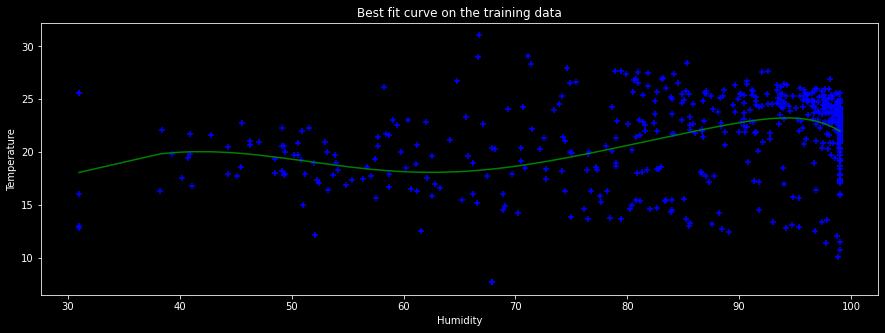

In [486]:
#Scatter Plot between Training Data
X_to_plot = X_train.copy()
ypred_plot = ypred_train[9].copy()
plt.figure(figsize=(15,5))
plt.scatter(X_train,Y_train,color = 'blue',marker = '+')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_to_plot,ypred_plot), key = sort_axis)

X_to_plot, ypred_plot = zip(*sorted_zip)
print(f"Y Predict: {type(ypred_plot)} X Plot: {type(X_to_plot)}")
plt.plot(X_to_plot, ypred_plot, color = 'green')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Best fit curve on the training data")

Text(0.5, 1.0, 'Best fit curve on the test data')

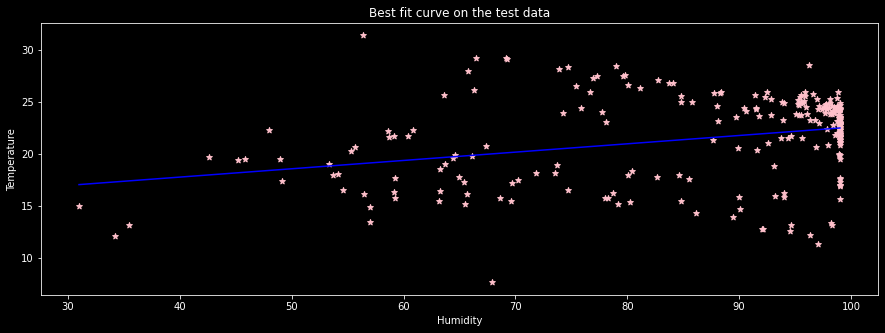

In [477]:
#Training Data between Test Data
X_to_plot = X_test.copy()
ypred_plot = ypred_test[1].copy()
plt.figure(figsize=(15,5))
plt.scatter(X_test,Y_test,color='pink',marker='*')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_to_plot,ypred_plot), key=sort_axis)

X_to_plot, ypred_plot = zip(*sorted_zip)
plt.plot(X_to_plot, ypred_plot, color = 'blue')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Best fit curve on the test data")

Text(0.5, 1.0, 'For best degree of polynomial (P=9)')

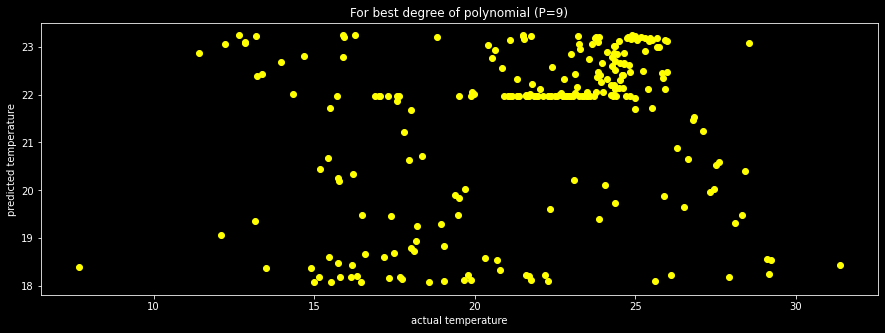

In [478]:
plt.figure(figsize=(15,5))
plt.scatter(Y_test,ypred_test[9], marker = "o", c="yellow")
plt.xlabel("actual temperature")
plt.ylabel("predicted temperature")
plt.title("For best degree of polynomial (P=9)")

In [479]:
X_train = X_train.flatten()
print(X_train.ndim)
print(Y_train.ndim)

1
1


<Figure size 1080x360 with 0 Axes>

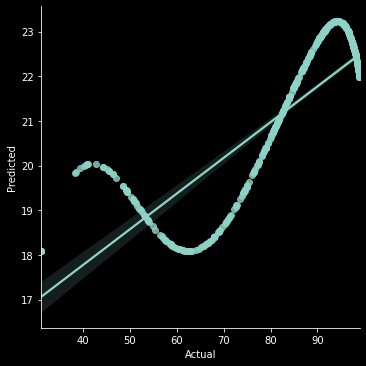

In [480]:
plt.figure(figsize=(15,5))
df_results = pd.DataFrame({'Actual': X_train, 'Predicted': y_pred_train})
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=True, scatter=True)
plt.show()